# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


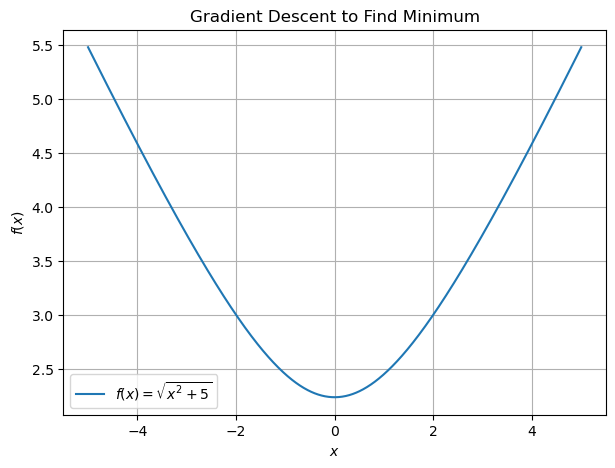

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
f = lambda x: np.sqrt(x ** 2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(7,5))
plt.plot(x, f(x), label=r'$f(x)=\sqrt{x^2+5}$')
plt.title('Gradient Descent to Find Minimum')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.legend()
plt.show()

x_T: 2.29327009920565e-13


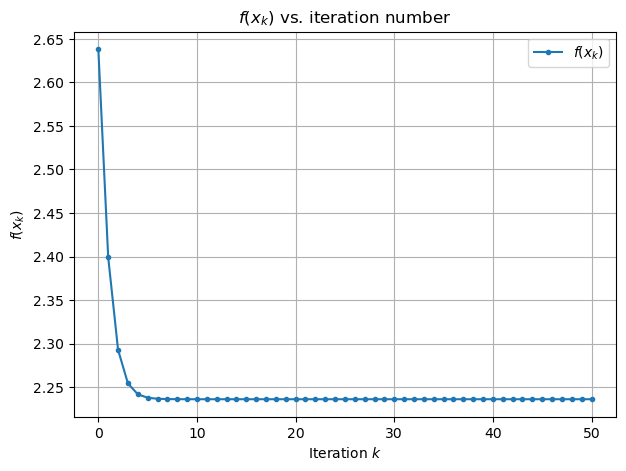

In [2]:
# Define the derivative of the function f(x), for gradient descent
derivative_f = lambda x: x / np.sqrt(x * x + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

def GradientDescent(x_0, step_size, num_iterations):
    x_list = [x_0]
    x = x_0
    for i in range(num_iterations):
        x = x - step_size * derivative_f(x)
        x_list.append(x)
    return x, x_list

# set up/assign initial values
x_0 = 2 / 5 + 1    # My SB ID ends with 2
step_size = 1
num_iterations = 50

# Run gradient descent by calling the function
x_T, x_list = GradientDescent(x_0, step_size, num_iterations)

# report x_T by printing out the value
print(f'x_T: {x_T}')

# Plot the f(x_k) values vs. iteration number
k = list(range(len(x_list)))
fx_list = [np.sqrt(x**2 + 5) for x in x_list]

plt.figure(figsize=(7,5))
plt.plot(k, fx_list, marker='o', label=r'$f(x_k)$', markersize=3)
plt.title(r'$f(x_k)$ vs. iteration number')
plt.xlabel(r'Iteration $k$')
plt.ylabel(r'$f(x_k)$')
plt.grid()
plt.legend()
plt.show()

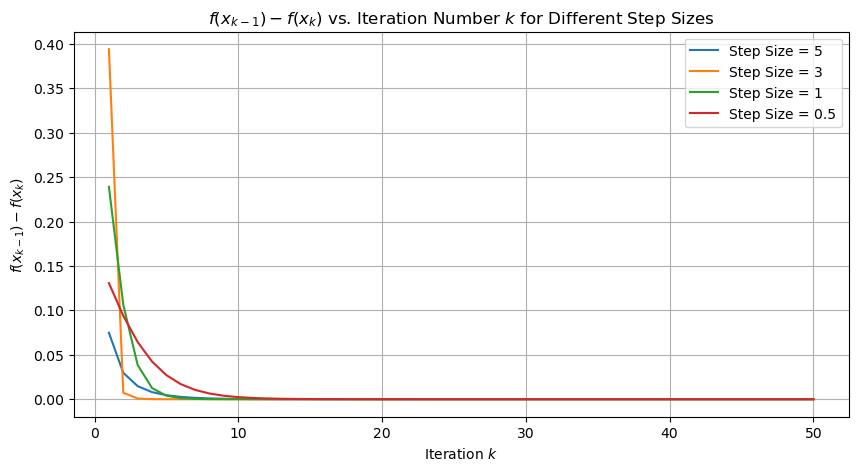

In [3]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
x_lists = []

# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    x_T, x_list = GradientDescent(x_0, step_size, num_iterations)
    x_lists.append(x_list)

# plot multiple curves in a single graph
# compute f(x_{k-1}) - f(x_k)
diff_lists = []
for x_list in x_lists:
    diff = []
    for k in range(1, len(x_list)):
        diff.append(f(x_list[k-1]) - f(x_list[k]))
    diff_lists.append(diff)

# k index: from 1 to num_iterations
k = list(range(1,len(diff_lists[0])+1))

plt.figure(figsize=(10,5))
for i in range(len(step_sizes)):
    plt.plot(k, diff_lists[i], label=f'Step Size = {step_sizes[i]}')
plt.title(r'$f(x_{k-1}) - f(x_k)$ vs. Iteration Number $k$ for Different Step Sizes')
plt.xlabel(r'Iteration $k$')
plt.ylabel(r'$f(x_{k-1}) - f(x_k)$')
plt.legend()
plt.grid()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



w1: 3.8810
w2: 0.5151
b: 4.2834


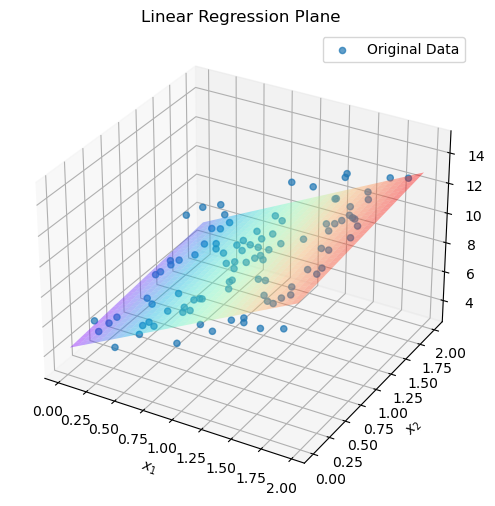

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(22)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[X, np.ones((100,1))]

# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane
w_1 = theta_best[0]
w_2 = theta_best[1]
b = theta_best[2]

print(f"w1: {w_1:.4f}")
print(f"w2: {w_2:.4f}")
print(f"b: {b:.4f}")

# Plot the generated data and the regression plane
# Extract features
x1 = X[:, 0]
x2 = X[:, 1]

# Make a grid for plotting the plane
x1_grid = np.linspace(x1.min(), x1.max(), 30)
x2_grid = np.linspace(x2.min(), x2.max(), 30)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)

# Compute regression plane Z = w1*x1 + w2*x2 + b
Z_grid = w_1 * X1_grid + w_2 * X2_grid + b

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter data points
ax.scatter(x1, x2, y, alpha=0.7, label='Original Data')

# Plot regression plane
ax.plot_surface(X1_grid, X2_grid, Z_grid, alpha=0.4, cmap='rainbow')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Linear Regression Plane')
ax.legend()
plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

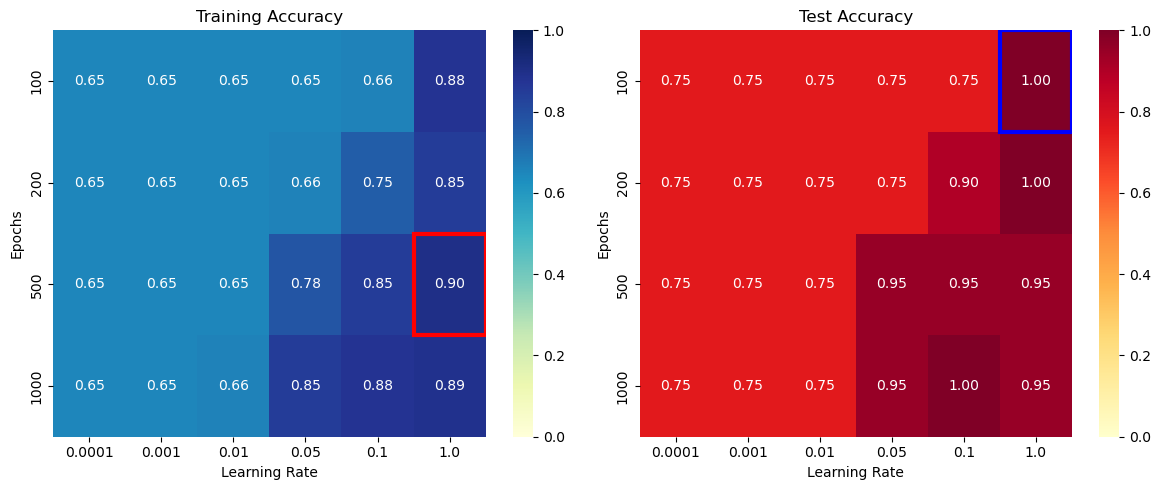

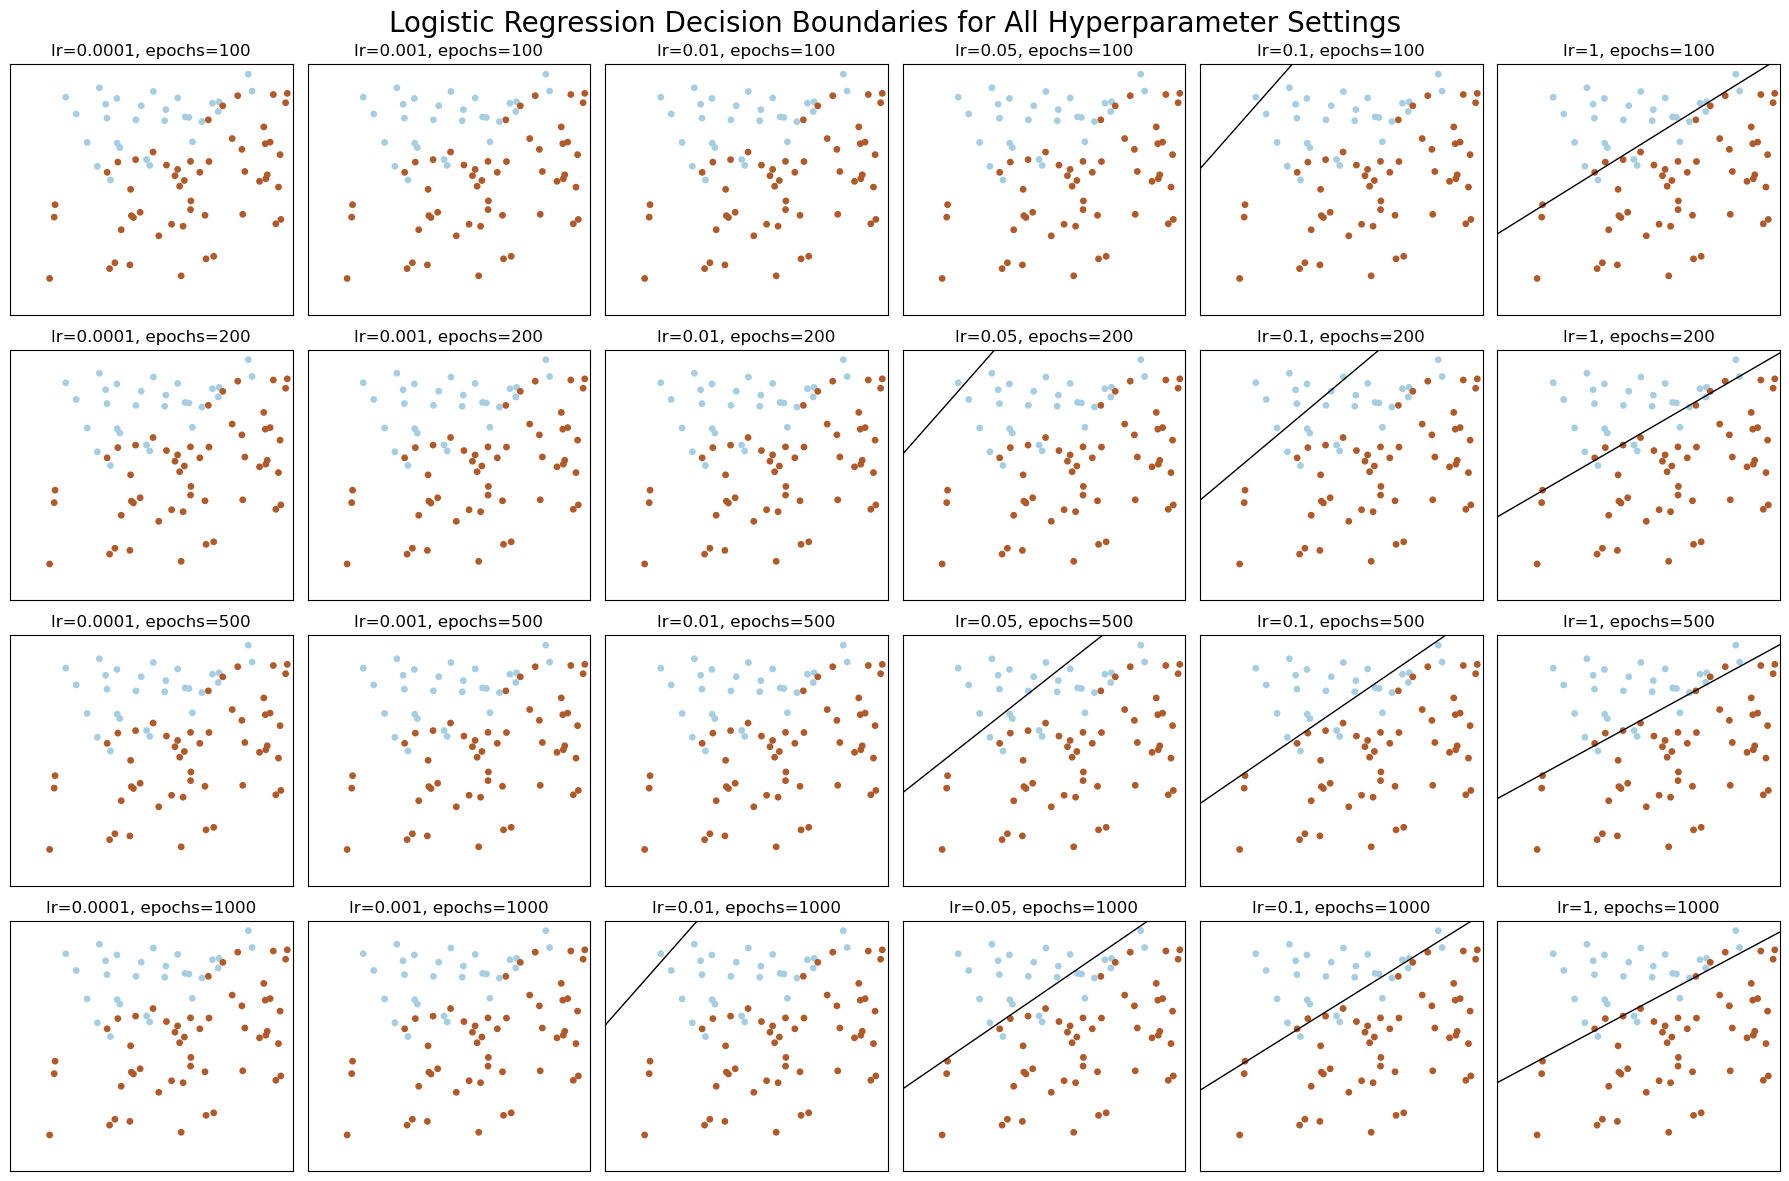

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate training and testing datasets
np.random.seed(595)
X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int)
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Set hyperparameters to try
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 1]
epoch_list = [100, 200, 500, 1000]

# We will store the results for analysis
results = []
boundary_params = []   # store (lr, epochs, w, b) for subplot drawing

# Start training
for learning_rate in learning_rates:
    for num_epochs in epoch_list:
        # Initialize w and b.
        w = np.zeros(X.shape[0])
        b = 0.0
        
        for epoch in range(num_epochs):
            A_train = sigmoid(np.dot(w.T, X_train) + b)
        
            dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
            dJdb = np.mean(A_train - Y_train)
        
            w -= learning_rate * dJdw
            b -= learning_rate * dJdb
        
        A_train = sigmoid(np.dot(w.T, X_train) + b)
        predictions_train = (A_train > 0.5).astype(int)
        
        A_test = sigmoid(np.dot(w.T, X_test) + b)
        predictions_test = (A_test > 0.5).astype(int)
        
        # Calculate training and testing accuracy
        train_accuracy = np.mean(predictions_train == Y_train)
        test_accuracy = np.mean(predictions_test == Y_test)
        
        #print(f"Training Set Accuracy: {train_accuracy:.2f}")
        #print(f"Test Set Accuracy: {test_accuracy:.2f}")

        # Store results in the table
        results.append([learning_rate, num_epochs, train_accuracy, test_accuracy])

        # Store parameters for subplotting
        boundary_params.append((learning_rate, num_epochs, w.copy(), b))

# Make a dataframe with results for analysis
df = pd.DataFrame(results, columns=['learning_rate', 'num_epochs', 'train_accuracy', 'test_accuracy'])

# Pivot to make 2D tables: rows = epochs, columns = learning_rate
train_pivot = df.pivot(index="num_epochs", columns="learning_rate", values="train_accuracy")
test_pivot  = df.pivot(index="num_epochs", columns="learning_rate", values="test_accuracy")

# Find location of maximum test accuracy
max_test_idx = np.unravel_index(np.argmax(test_pivot.values), test_pivot.shape)
max_train_idx = np.unravel_index(np.argmax(train_pivot.values), train_pivot.shape)

# ---------- VISUALIZE RESULTS BY USING HEATMAPS ----------
plt.figure(figsize=(12, 5))

# Training accuracy heatmap
plt.subplot(1, 2, 1)
sns.heatmap(train_pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1, fmt=".2f")
# Highlight max training accuracy with a rectangle
plt.gca().add_patch(plt.Rectangle(
    (max_train_idx[1], max_train_idx[0]), 1, 1,
    fill=False, edgecolor='red', lw=3))
plt.title("Training Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs")

# Test accuracy heatmap
plt.subplot(1, 2, 2)
sns.heatmap(test_pivot, annot=True, cmap="YlOrRd", vmin=0, vmax=1, fmt=".2f")
# Highlight max test accuracy with rectangle
plt.gca().add_patch(plt.Rectangle(
    (max_test_idx[1], max_test_idx[0]), 1, 1,
    fill=False, edgecolor='blue', lw=3))
plt.title("Test Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs")

plt.tight_layout()
plt.show()

# ---------- SUBPLOT OF ALL DECISION BOUNDARIES ----------
fig, axes = plt.subplots(len(epoch_list), len(learning_rates),
                         figsize=(18, 12))

xlim = (-0.2, 1.2)
ylim = (-0.2, 1.2)
xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))

for idx, (lr, ep, w, b) in enumerate(boundary_params):
    row = epoch_list.index(ep)
    col = learning_rates.index(lr)

    ax = axes[row, col]
    ax.scatter(X_train[0], X_train[1], c=Y_train, cmap=plt.cm.Paired, s=15)

    Z = sigmoid(np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b)
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(f"lr={lr}, epochs={ep}")

    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("Logistic Regression Decision Boundaries for All Hyperparameter Settings",
             fontsize=20)
plt.tight_layout()
plt.show()